# Functions

A function in programming is similar to a function in math - variables go in, operations occur, results come out.  In fact, your instructor passed all his higher level math classes by learning to reinterpret complex mathematical equations as programming functions.  For example, if you wanted to obtain the sum of all integers between 0 and 1000, you would do the following:

**Math**

$\sum\limits_{x=0}^{1000}x$

**Python**

```python
total = 0
for x in range(0,1001):
    total += x
print(total)
```

**C++**

```C++
int total = 0;
for(int x=0;x<=1000;x++)
{
    total += x;
}
cout << total << endl;
```
---

The functions above produce the same value.  They are simply different representations of the same algorithm.

*What do you notice that's different between these two programming languages?*

If you find there's a task or set of instructions that you do multiple times in a program/script, you might find it useful to convert it into a function.  

Functions have the benefit of ensuring that the calculations are being performed consistently - you only have to get the code right once!

However, it's also important to consider if something is **worth** turning into a function.  Whenever you think about building a function, the first thing to do is see if it already exists.  This is a fundamental rule for programming and science - don't reinvent the wheel unless you can make it a lot better.

### Python Functions

For today, we'll focus on python functions.


*A function to return the remainder of one number divided by another.  That might look somethink like this:*

```python
def get_remainder(number,divisor):
    if number > divisor:
        return get_remainder(number-divisor,divisor)
    else:
        return number
```

Experienced programmers will look at the function above and consider hunting me down.  Rightfully so, for multiple reasons.  First and most importantly, the function is unnecessary.  There already exists a function to get the remainder of a number and a divisor, called "modulo", and is called using `%`  like so:



In [ ]:
23%5

That is so much easier than writing the function above.  However, that's not the only reason the function above will drive programmers nuts:  **[Recursion](https://www.google.com/search?biw=924&bih=939&sxsrf=ALiCzsYF5yDBRHIPvQK0WvoahmOQWNTLaw:1652715574983&q=recursion&spell=1&sa=X&ved=2ahUKEwjhw4umreT3AhVBCjQIHQeACCYQBSgAegQIAhAy)**

Recursive functions are any function that calls itself during its execution.  While there are some situations where recursion may be necessary, There is nearly always a cleaner solution.

The problems with recursion lie in the fact that such a function can call itself infinitely if not well-written, and can become computationally expensive and slow.  So if you ever find yourself writing a function that calls itself, get another opinion from someone else.

---

Okay, let's start at the basics of writing a function in Python

Every function must be *defined* before it can be *called* (used).  In Python, a function definition begins with the command `def`, followed by the name of the function and then any function *arguments* it will need.  *Arguments* are named variables that will be used inside the function.  This means that any needed variables that aren't given to the function as an argument must be created inside the function.  After the arguments, you need a `:` to indicate that the following code is what should be executed whenever the function is called.  It's also good practice to include the `return` command at the end of the function, even if nothing is sent back to where the function was called.

An example is below.

In [ ]:
def myfunction(argument1,argument2,argument3):
    print(argument1)
    print(argument2)
    print(argument3)
    return

This is a fairly simple function, and now that we've defined it, we can call it as much as we want.

In [ ]:
myfunction("potato","nebula","agreeable")

In [ ]:
myfunction(4,78.951,9001)

Note that the two different calls above pass different types of data to the function, but the function is able to handle them all.  Let's try a different function that does some math on the variables we pass it.

In [ ]:
def mymathfunction(arg1,arg2,arg3):
    result = arg1 + arg2 - arg3
    return result

Now, looking at the function above, we expect it to use numbers as arguments.

In [ ]:
answer = mymathfunction(5,10,3)
print(answer)

What if we passed data that wasn't a number?

In [ ]:
answer = mymathfunction(5,10,"cactus")
print(answer)

Now we get a type error.  Fortunately, we can rewrite the function to include "type hints".  If we add `:float` after the variable names in the function definition, we're telling the programmer "This variable should be of the `float` data type".  Please note that it doesn't actually stop the user from passing incorrect data types to the function.

In [ ]:
def mymathfunction(arg1:float, arg2:float, arg3:float):
    result = arg1 + arg2 - arg3
    return result

In [ ]:
answer = mymathfunction(5,10,"cactus")
print(answer)

Recall the booleans we discussed yesterday.  We can use them along with a *type check* in our function to first make sure the arguments to our function are of the correct type.

In [ ]:
# declare a variable as an integer.
x = 5

# check if it's an integer.
print(isinstance(x,int))

# check if it's a float.
print(isinstance(x,float))

We can see how the `isinstance` function (which doesn't need to be defined because it's already part of the base python) takes the variable we give it and a type, and returns a boolean response.  Note that the `int` and `float` checks return different results.  However, as programmers we know that python math with integers and floats is (generally) interchangable.

How can we use this to guard our functions?

In the example below, we will create an empty list for the type checks, then add the result of each check to the list.  Then, if the whole list is `True`, we will proceed with the function.  If it's not all `True`, we'll exit the function without doing anything.

In [ ]:
def mymathfunction(arg1:float, arg2:float, arg3:float):
    # make an empty list
    variable_type_checks = []
    # check if arg1 is a float or an integer and add the result to the list
    variable_type_checks.append( any( [isinstance(arg1,float), isinstance(arg1,int)] ) )
    # check if arg2 is a float or an integer and add the result to the list
    variable_type_checks.append( any( [isinstance(arg2,float), isinstance(arg2,int)] ) )
    # check if arg3 is a float or an integer and add the result to the list
    variable_type_checks.append( any( [isinstance(arg3,float), isinstance(arg3,int)] ) )

    # check if the entire list is "True"
    if all(variable_type_checks):
        result = arg1 + arg2 - arg3
        return result
    # if the above fails (the if-condition is not met), we'll do the next section instead.
    elif any(variable_type_checks):
        print("Some arguments are not floats.")
        return None
    # if nothing above worked, do this.
    else:
        print("Every argument is not a float!")
        return None

This function is a bit larger, but it's including additional checks and conditions to ensure it works correctly.

In [ ]:
answer = mymathfunction(5,10,3)
print(answer)

In [ ]:
answer = mymathfunction(5,10,"cactus")
print(answer)

In [ ]:
answer = mymathfunction("cheese","crater","cactus")
print(answer)

We have the three possible outcomes for this function above.  In all cases, the function executed without throwing an error (which can cause the program to crash entirely), and each returned a result.

The two "failing" function calls returned the `None` datatype.  In C++, this is called `NULL`.  Both effectively mean there's an empty spot.  However, we can still treat `None` like a data type.

In [ ]:
answer = mymathfunction("cheese","crater","cactus")

answer == None

We can use the `None` comparison to check results, which can be useful in larger functions or programs.

What if there are external values that you need to change inside the function?  By default, when you pass arguments to functions in Python, you're not passing the variable itself, but a copy of the value inside.  Consider the function below.


In [ ]:
def f(x):
    x = x+10
    print(x)

# set x to a value
x = 5
# print the value of x
print(x)
# call the function f(x), which internally changes the value of x and then prints it
f(x)
# print the value of x
print(x)

Now, here we can see that the value of `x` *outside* the function `f(x)` never changes, even though it's changed inside.  This is an example of *scope* that we discussed yesterday.  What if we wanted to change the value of `x` with the function?

We can use `global` to pull variables in from the outside and use/modify them.  This is particularly useful when you're wanting to change a large dataset, like a list of xyz-coordinates for a bunch of particles (as a completely innocent and totally-not-foreshadowing example).

In [ ]:
def f():
    global y
    y = y+10

y=7
print(y)
f()
print(y)

Now we see how the function `f()` without any arguments was able to modify the value of `y` outside itself.

Now that you know about `global`, be aware that it can be very dangerous if used improperly.

<img src="Images/DeathSword.png" width="1000">

In Python, functions can pull external things inside with `global`, but nothing can be pulled from inside a function except things the function *returns*.

You can also nest function calls inside other functions, which can be useful as well.

In [3]:
def f(x):
    return x**2 + 7

def g(x):
    return x*f(x)

print(g(-3))
print(g(4))

-48
92


That's a very simple example, but you can see how having smaller functions can lend itself to a modularity and reusability that can become very convenient.

Let's try creating some other functions, perhaps based on the pseudocode project from last time.

1. Write a function to generate a random set of coordinates for a particle in a cube with an edge length of 20.
2. Write a function to create a list of `N` randomly placed particles.
3. Write a function to generate a random movement of a particle with each `x`, `y`, and `z` component of the motion vector as a random value between -1 and +1.
4. Write a function to make each particle in the list take `S` number of random motion steps.
5. Write a function to measure the distance between the starting and ending points of all particles.

I will include some helper functions for things like random number generation below.  For all functions you'll write below, you will need to choose what arguments you need to pass to the function and how to get to the result at the `return` statement ending each function.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def random(lower,upper):
    return np.random.uniform(low=lower, high=upper)

def plot_distances(distances):
    plt.hist(distances, bins=100, density=1)
    plt.show()


In [20]:
# Generate particle with random position [x,y,z]
def CreateParticle():
    ### Your code goes here!

    return particle


In [ ]:
# Create a list of N randomly generated particles
def GenerateParticleCollection():
    ### Your code goes here!
    
    return all_particles

In [ ]:
# generate a random motion between -1 and 1 in all axes and apply it to a given particle.
def MoveParticle():
    ### Your code goes here!

    return new_position
    

In [ ]:
# Move all particles in your list S number of times and return the final positions.
def BrownianMotionSimulation():
    ### Your code goes here!
    
    return final_positions

In [21]:
# Compare starting and ending positions for all particles and return the distances.
def CalculateDistances():
    ### Your code goes here!

    return distances

Now write a sequence of function calls, variable assignments, etc. to run through your algorithm.

In [23]:
# This is your main "program", which will use the functions you've written and return a nice histogram of the resulting distances traveled by each particle.

# Generate 10000 particles

# Move the particles 100 steps.

# Measure the distances between starting and ending positions.

# use the `plot_distances()` function call to show the results as a histogram.

If you got a histogram plot that looks like it could be the results of the random motion of 10,000 particles, your program probably works great!

Now that we've all completed that, let's consider some additional things about the algorithm and the *actual* execution of it.

For example, does the distance travelled have any dependency on the original position of the particles?  If not, what can we do to reduce the amount of work being done by the computer?  Can we reduce the entire program down to something smaller?

Programming is often thought of as "make the computer do a task", which is true, but in the larger picture of scientific programming, it's important to consider the actual goals.

If we re-examine the actual goal of "obtain a distribution of how far particles will travel given random motion", we can reduce the algorithm down significantly.

- The x, y, and z components of motion are all generated the same way and independently of each other.
- Each particle's motion is independent of all the other particles, as is its final distance traveled.
- The final distance is independent of the starting coordinates.

With these points in mind, can you think of a new form of the algorithm?

In [24]:
# start empty list of distances
# loop through number of particles to test
    # start particle position at 0,0,0
    # make S number of x moves, sum them up to a final x position
    # make S number of y moves, sum them up to a final y position
    # make S number of z moves, sum them up to a final z position
    # calculate norm of x,y,z coordinates
    # append norm to list of distances.
# plot histogram of distances

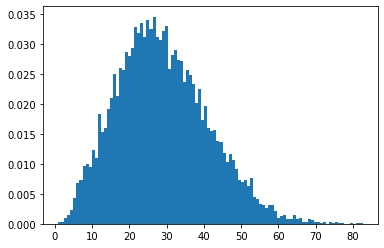

In [28]:
distances = []
for i in range(10000):
    x=0
    y=0
    z=0
    for j in range(1000):
        x += random(-1,1)
        y += random(-1,1)
        z += random(-1,1)
    norm = np.linalg.norm([x,y,z])
    distances.append(norm)

plot_distances(distances)

What if you wanted to give a function an unknown number of arguments?  Say, for example, you wanted to give it some random number of `float` values and have it multiply the reciprocals of each together?  The mathematical formula would look like this:

$\prod\limits_{i=1}\frac{1}{x_i}$

The Python function can use `*args` as an argument.  The `*` indicates the value is going to be some arbitrary length list of values that should be collected by the function.

In [29]:
def product_of_reciprocals(*args):
    # Start with the product set to 1 (since anything multiplied by one is itself).
    product=1
    for arg in args: # iterate through all the values given in the function call
        product = product * (1/arg) # multiply the current product value by the reciprocal of the current arg value, and assign it to the product value
    return product

In [30]:
product_of_reciprocals()

1

In [31]:
product_of_reciprocals(3,6,95)

0.0005847953216374268

In [32]:
product_of_reciprocals(1,1,2,3,5,8,11)

0.0003787878787878788

In [36]:
product_of_reciprocals(0.1, 0.2, 0.5, 1.0, 1.5, 2.0, 5.0, 7.0, 10.0002)

0.09523619051428493

With `*args`, any number of values may be passed to the function.

What about unknown and arbitrary number of arguments that must be assigned to specific keywords?

Here, we can use `**kwargs`, which is short for "keyword arguments".  This specifically requires that each additional argument be given as a variable and an assignment. These can be useful if there are specific things you want your function to do, but only if those arguments are present.

The `**` indicates that `kwargs` will be a `dictionary` data type, which is a list of mapped keys and values.  Therefore, using the individual keywords requires a little knowledge of dictionary manipulation.

In [39]:
def PrintKwargs(**kwargs):
    for key,val in kwargs.items():
        print("The",key,"says",val)
    return


In [41]:
PrintKwargs(chicken="bawk",cow="moo",farmer="it looks like rain",dog="woof")

The chicken says bawk
The cow says moo
The farmer says it looks like rain
The dog says woof


What if we include an argument without assigning it to a keyword?

In [43]:
PrintKwargs(chicken="bawk",cow="moo",farmer="it looks like rain",dog="woof","nothing assigned")

SyntaxError: positional argument follows keyword argument (3123196330.py, line 1)

Not great.  In this case, you get an error because there's something passed to the function that isn't a keyword argument.  As an aside, a "positional argument" is just the regular arguments we worked with in the examples before `*args` and `**kwargs`.

What if we wanted to account for keyword arguments AND unassigned arguments?

You can use positional arguments, `*args`, and `**kwargs` in your function calls, so long as they're in that order.

Positional arguments may also have default values assigned to them in the function definition.  Any default variables should be placed at the end of the *positional arguments*, but before the `*args` and `**kwargs`.

In [1]:
def BigFunction(x,y,z=10,*args,**kwargs):
    print("x is",x)
    print("y is",y)
    print("z is",z)
    for arg in args:
        print("Found arg: ",arg)
    for key,value in kwargs.items():
        print("keyword",key,"is",value)


In [2]:
BigFunction(3,4,6,"bear","goat","llama","emu","shark",potato="mashed",dinner="ready")

x is  3
y is  4
z is 6
Found arg:  bear
Found arg:  goat
Found arg:  llama
Found arg:  emu
Found arg:  shark
keyword potato is mashed
keyword dinner is ready


One thing to keep in mind is that positional arguments get assigned before anything gets dumped into `*args`.  Above, even though `z` has a default value, it got assigned a value of `6` from the function call because `6` was in that position.  Everything afterwards was combined into `*args`.